# **<center><span style= "color:green;">Linear regression with single variable</span></center>**

## ***<span style= "color:maroon;">Contents </span>***
- ***`Imports`*** 
- **`Intializing the dataset`** 
- **`Linear regrssion model`**
- **`Evaluate the model`**
- **`Ploting`**

## ***<span style= "color:purple;">Imports </span>***

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## ***<span style= "color:#6B8E23;">Generating the dataset </span>***

In [ ]:
# loading dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

In [4]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [27]:
# Selecting one feature and sperating dependent and independent variables 
X = df[['MedInc']]
y = df['Target']

# # Sperating dependent variables and independent variables
# X = df.drop(columns=['Target'])
# y = df['Target']

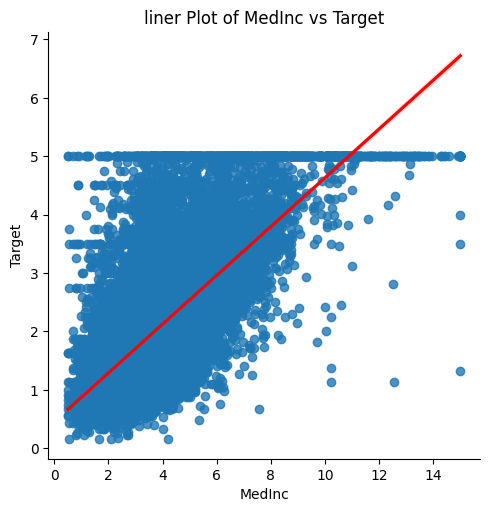

In [74]:
# Ploting before prediction 
# Ideal case of problem
sns.lmplot(data=df, x="MedInc", y="Target",line_kws={'color': 'red'})

# plt.scatter(X, y)
plt.xlabel('MedInc')
plt.ylabel('Target')
plt.title('liner Plot of MedInc vs Target')
plt.show()

In [31]:
# spliting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [46]:
# stadardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ***<span style= "color:#6A5ACD;">Implementing linear regression model </span>***

In [47]:
# intialize the linear regression model
model = LinearRegression()

In [49]:
# train the model on the full trainig set
model.fit(X_train, y_train)

LinearRegression()

In [50]:
print(model.intercept_)

0.44459729169078677


In [51]:
print(model.coef_)

[0.41933849]


In [52]:
y_pred = model.predict(X_test)

In [53]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.7091157771765548


In [54]:
print("R^2 Score:", r2_score(y_test, y_pred))

R^2 Score: 0.45885918903846656


## ***<span style= "color:#008B8B;">Ploting linear relation between dependent and independent variable </span>***

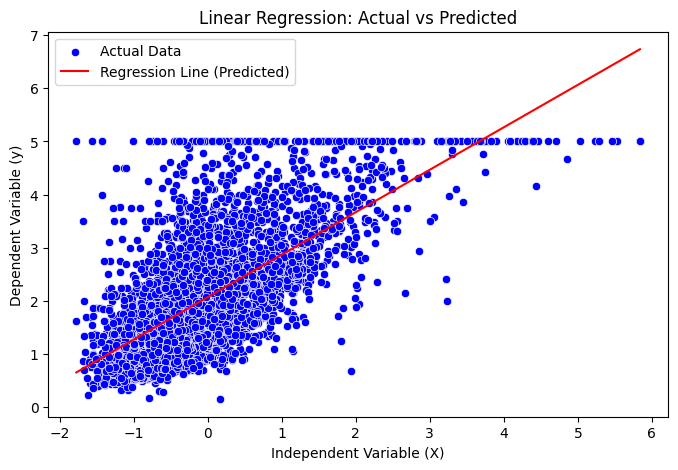

In [72]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test_scaled.flatten(), y=y_test, color='blue', label="Actual Data")
sns.lineplot(x=X_test_scaled.flatten(), y=y_pred, color='red', label="Regression Line (Predicted)")

plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (y)")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()